# Visualise receptive field of the blind spot model
TF2 version

In [1]:
import numpy as np
from architecture import get_blindspot_model
from tensorflow.keras import backend as K
from tensorflow.keras.initializers import Ones, Zeros

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

### Create a model with kernes of ones and with biases of zero

In [3]:
# When using this model, change the initializers to different ones (e.g delete it for the default ones)
K.clear_session()
input_shape = (32,32,1)
model = get_blindspot_model(input_shape, out_channels=1, depth=5, kernel_initializer=Ones, bias_initializer=Zeros)

In [4]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 128)  1280        input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 32, 32, 128)  0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 128)  147584      leaky_re_lu[0][0]                
______________________________________________________________________________________________

### Construct a plane with a single point, pass it to the network, and visualise the output (in log scale)

In [5]:
plane = np.zeros((1,) + input_shape, np.float32)
plane[0, input_shape[0]//2, input_shape[1]//2, 0] = 1

rf = model(plane)

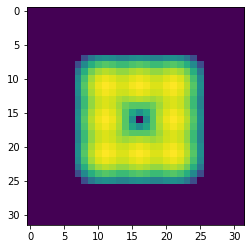

In [6]:
if (rf[0, input_shape[0]//2, input_shape[1]//2, 0]) != 0:
    print("!!!NOT A BLIND SPOT ARCH.!!!")

rf = np.ma.log(rf)
rf = rf.filled(rf.min())

plt.imshow(rf[0,...,0])